<a href="https://colab.research.google.com/github/seopp/Tobigs19/blob/main/Week9/Week9_RS_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬을 이용하여 무지렌즈 데이터(ml-latest-small)를 전처리 및 EDA 진행해주세요.  
유의미한 분석 5개 이상. 
Memory based CF 2개 이상, Model based CF 2개 이상 알고리즘을 사용해서 아래 결과를 출력해주세요.  
성능 평가.   
추천 결과 출력

In [ ]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 런타임 다시 시작

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 폰트
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)

## Data

In [3]:
links = pd.read_csv('links.csv', index_col = 'movieId')
movies = pd.read_csv('movies.csv', index_col = 'movieId')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [7]:
links.tail(3)

,imdbId,tmdbId
movieId,,
193585,6397426,479308.0
193587,8391976,483455.0
193609,101726,37891.0


In [8]:
movies.tail(3)

,title,genres
movieId,,
193585,Flint (2017),Drama
193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [9]:
ratings.tail(3)

,userId,movieId,rating,timestamp
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [10]:
tags.tail(3)

,userId,movieId,tag,timestamp
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978
3682,610,168248,Heroic Bloodshed,1493844270


## EDA

In [11]:
movies['year'] = movies['title'].str.extract('(\(\d\d\d\d\))') 
movies['year'] = movies['year'].apply(lambda x: str(x).replace('(','').replace(')',''))
movies.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [12]:
genres_df = movies['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

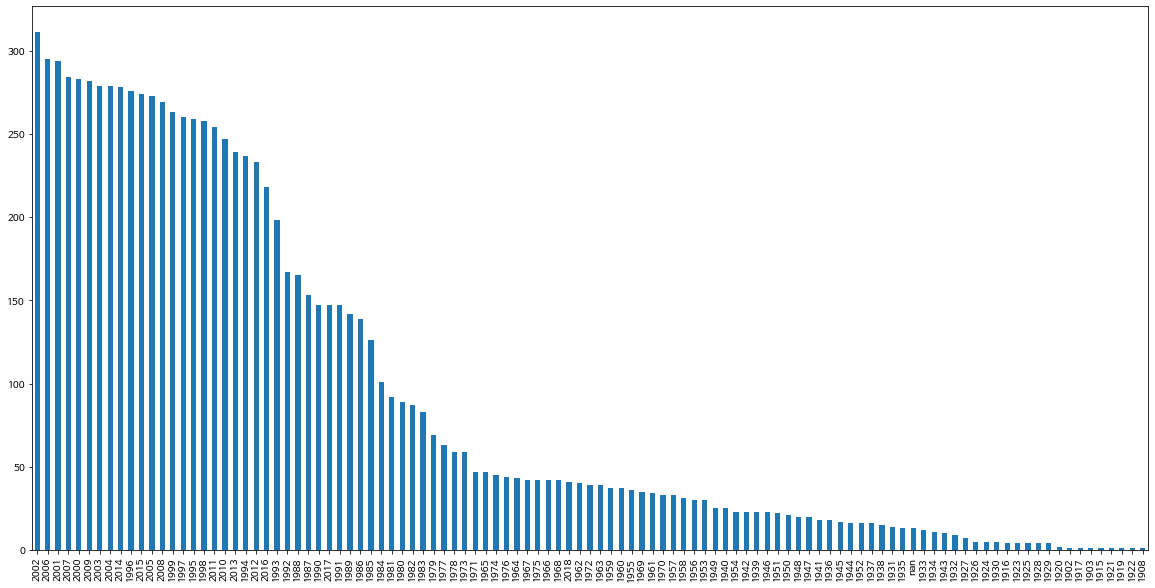

In [13]:
plt.figure(figsize=(20,10))
vc_year = movies['year'].value_counts()
vc_year.plot.bar()

## Memory-based CF

In [26]:
genre_list = []
for idx in range(len(movies['genres'])):
  for genre in movies['genres'].iloc[idx]:
    if genre not in genre_list:
      genre_list.append(genre)

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# Item-based CF
movies_items = pd.DataFrame(index=movies.index, columns=genre_list)

for id in range(len(movies_items)):
  for genre in movies.iloc[id]['genres']:
    movies_items.iloc[id][genre] = 1
movies_items = movies_items.fillna(0)

movies_items

,A,d,v,e,n,t,u,r,|,i,...,S,-,W,I,X,N,(,,g,)
movieId,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,1,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
193583,1,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
cos_movies = pd.DataFrame(cosine_similarity(movies_items, movies_items))
cos_movies.index = movies_items.index
cos_movies.columns = movies_items.index

cos_movies

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.945905,0.622543,0.636285,0.561951,0.735767,0.622543,0.827170,0.468293,0.770054,...,0.745601,0.652929,0.652929,0.606977,0.622543,0.829288,0.858395,0.344124,0.611775,0.561951
2,0.945905,1.000000,0.511891,0.538138,0.396059,0.648204,0.511891,0.874475,0.396059,0.751469,...,0.666973,0.536875,0.536875,0.458349,0.511891,0.751469,0.777844,0.242536,0.485071,0.396059
3,0.622543,0.511891,1.000000,0.919866,0.738549,0.564076,1.000000,0.418121,0.369274,0.467099,...,0.753778,0.476731,0.762770,0.455842,0.636364,0.778499,0.725241,0.301511,0.603023,0.738549
4,0.636285,0.538138,0.919866,1.000000,0.679366,0.592999,0.919866,0.461538,0.339683,0.501280,...,0.693375,0.613941,0.877058,0.419314,0.752618,0.716115,0.667124,0.554700,0.554700,0.679366
5,0.561951,0.396059,0.738549,0.679366,1.000000,0.436436,0.738549,0.339683,0.166667,0.316228,...,0.612372,0.258199,0.774597,0.308607,0.492366,0.632456,0.654654,0.204124,0.272166,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.829288,0.751469,0.778499,0.716115,0.632456,0.690066,0.778499,0.572892,0.632456,0.600000,...,0.903696,0.653197,0.653197,0.683130,0.622799,1.000000,0.966092,0.258199,0.774597,0.632456
193583,0.858395,0.777844,0.725241,0.667124,0.654654,0.642857,0.725241,0.592999,0.545545,0.552052,...,0.868599,0.676123,0.676123,0.707107,0.564076,0.966092,1.000000,0.267261,0.712697,0.654654
193585,0.344124,0.242536,0.301511,0.554700,0.204124,0.267261,0.301511,0.138675,0.000000,0.129099,...,0.250000,0.632456,0.632456,0.377964,0.603023,0.258199,0.267261,1.000000,0.333333,0.204124


In [34]:
# 비슷한 장르의 영화 추천
def recommend_movies(movie_id, data, top_k=5):
  idx = movies[movies_items.index == movie_id].index.values
  filter = (np.array(data)).argsort()[:,::-1]

  print('영화 제목: ', movies['title'].loc[movies.index == movie_id].values[0])
  print('영화 장르: ',  movies['genres'].loc[movies.index== movie_id].values[0])

  top_movies = filter[idx,:].reshape(-1)
  top_movies = top_movies[top_movies != idx]

  top_list  = movies.iloc[top_movies][: top_k]

  print(f"########## Top {top_k} Movies ##########\n")
  print(f"MovieId: {movie_id}에 대한 비슷한 장르 영화")
  return top_list

In [35]:
recommend_movies(1325, cos_movies, top_k=10)

영화 제목:  Amityville: A New Generation (1993)
영화 장르:  Horror
########## Top 10 Movies ##########

MovieId: 1325에 대한 비슷한 장르 영화


,title,genres,year
movieId,,,
110501,The Raid 2: Berandal (2014),Action|Crime|Thriller,2014
4351,Point Break (1991),Action|Crime|Thriller,1991
592,Batman (1989),Action|Crime|Thriller,1989
1953,"French Connection, The (1971)",Action|Crime|Thriller,1971
23,Assassins (1995),Action|Crime|Thriller,1995
56156,Hitman (2007),Action|Crime|Thriller,2007
112171,"Equalizer, The (2014)",Action|Crime|Thriller,2014
120635,Taken 3 (2015),Action|Crime|Thriller,2015
99910,"Last Stand, The (2013)",Action|Crime|Thriller,2013
